In [27]:
%matplotlib inline
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

import itertools

from scipy import linalg


from sklearn import mixture

# color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
#                               'darkorange'])

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
color_iter = itertools.cycle(colors)

def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(1, 1, 1)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.3)
        splot.add_artist(ell)

    plt.title(title)



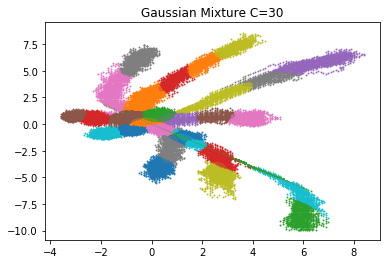

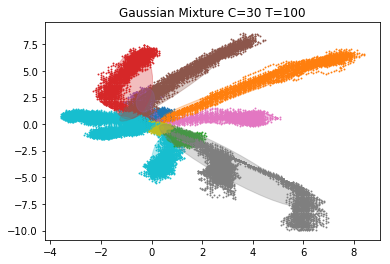

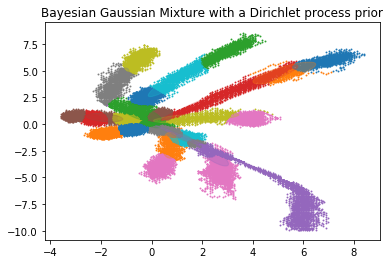

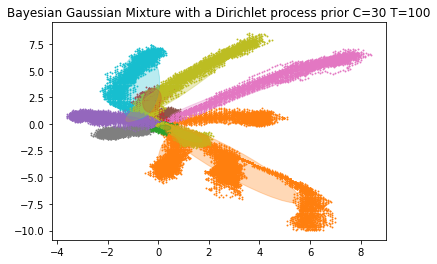

In [28]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import sklearn

import os
import sys
sys.path.append('../sklearn')
# print(os.listdir('..'))
import sklearn
import sklearn.mixture
data = np.load('/Users/ajabri/Downloads/data_itr20.pkl')

X = data.reshape(data.shape[0]*data.shape[1], data.shape[2])
N, T = data.shape[:2]

C = 30


gmm = sklearn.mixture.GaussianMixture(n_components=C).fit(X)

# Number of samples per component
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture C=%s' %C)
plt.show()

gmm2 = sklearn.mixture.GaussianMixture(n_components=C, group=T).fit(X)

# Number of samples per component
plot_results(X, gmm2.predict(X), gmm2.means_, gmm2.covariances_, 1,
             'Gaussian Mixture C=%s T=%s' % (C, T))
plt.show()

# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = sklearn.mixture.BayesianGaussianMixture(n_components=C,
                                        covariance_type='full').fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 2,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')
plt.show()

# Fit a Dirichlet process Gaussian mixture using five components
dpgmm2 = sklearn.mixture.BayesianGaussianMixture(n_components=C,
                                        covariance_type='full', group=T).fit(X)
plot_results(X, dpgmm2.predict(X), dpgmm2.means_, dpgmm2.covariances_, 3,
             'Bayesian Gaussian Mixture with a Dirichlet process prior C=%s T=%s' % (C, T))

plt.show()

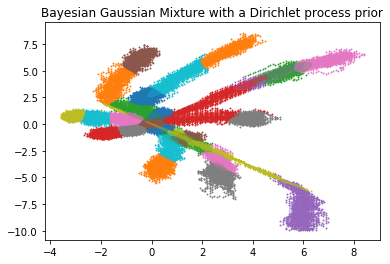

In [30]:
# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = sklearn.mixture.BayesianGaussianMixture(n_components=C, weight_concentration_prior=0.01,
                                        covariance_type='full').fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 2,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')
plt.show()

In [32]:
print(dpgmm.weights_)

[ 0.08937102  0.03185567  0.00656777  0.08574019  0.01464976  0.02240116
  0.01468805  0.03137309  0.05820712  0.08483199  0.04424784  0.0183067
  0.02717819  0.01962761  0.00802727  0.03272707  0.01586353  0.06013382
  0.03810027  0.01811133  0.04616008  0.01606833  0.00468892  0.01909313
  0.00519575  0.04830694  0.0656426   0.02042948  0.03938527  0.01302006]
